# Use of Convolutional Neural Networks for Classification in smart Glasses - 2

Author: Vaibhav Amit Patel

** In the previous article, we explained what deep learning and convolutional neural network are. In this article, we will go into more details of our network as well as the code to reproduce it. **


In our work, we have collected a total of 1000 images. We divided those images into training, validation and testing splits. The dataset is very limited, so we needed to augment the data or we have to use transfer learning. To understand transfer learning and some different variants of convolutional neural network, one can start with MNIST classification as a start. MNIST is a simple hand-written digit classification datast consisting of 60000 images and contains only 10 classes. The images size is 28 \* 28 and the dataset is binary. 

### We will now start with the code, but first you need to install Keras, Tensorflow and Numpy in your Linux System.
To test the installation please run the code below.

In [1]:
# import numpy, keras and matplotlib
import numpy as np
import keras.models as km
import matplotlib.pyplot as plt
%matplotlib inline

from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Convolution2D, MaxPooling2D
from keras.datasets import mnist
import os
import scipy.misc as sm
from keras.utils import np_utils
from keras.models import model_from_json
model=km.Sequential()
model.add(Convolution2D(20,3,3,input_shape=(28,28,1) ))

Using TensorFlow backend.
/opt/conda/lib/python3.6/site-packages/ipykernel/__main__.py:15: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(20, (3, 3), input_shape=(28, 28, 1...)`


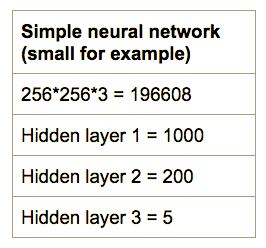

In the folder images, there are 60000 images of total 10 digits, each in a sub-folder containing around 6000 images. We will get the total number of images in the dataset by summing up all the files in each subfolder.

In [3]:
path1='images/'
ls1=os.listdir(path1)
count=0
for idx,i in enumerate(ls1):
    ls2=os.listdir(path1+i)
    count=count+len(ls2)

NotADirectoryError: [Errno 20] Not a directory: 'images/model.png'

In [4]:
ls2=os.listdir(path1+ls1[0])[0]
sizes=sm.imread(path1+ls1[0]+'/'+ls2).shape

NotADirectoryError: [Errno 20] Not a directory: 'images/model.png'

For slower computers (or computer without powerful GPU), we decided to train on only 1000 images of each class. 
We will load all the images in a 3 dimensional matrix of size 10000 \* 28 \* 28 and all the labels (0 to 9), in another 1-dimenstional matrix of size 10000 \* 1.

count=10000
X=np.random.rand(count,sizes[0],sizes[1])
Y=np.random.rand(count,1)

Xind=0
for idx,i in enumerate(ls1):
    ls2=os.listdir(path1+i)
    for jdx,j in enumerate(ls2[0:1000]):
        X[Xind,:,:]=sm.imread(path1+i+'/'+j)
        Y[Xind]=int(i)
        Xind=Xind+1
        #if(jdx%100==0):
            #print jdx/100.0
    print(idx)


In [5]:
#  Just to check whether we loaded all the images right or not?
plt.imshow(X[0], cmap='gray')
Y[0]

NameError: name 'X' is not defined

In [6]:
batch_size = 100
total_classes = 10
Epochs = 5

In [7]:
X = X.reshape(X.shape[0],  sizes[0], sizes[1],1)
X = X.astype('float32')
X /= 255

NameError: name 'X' is not defined

#### Now, we will write the core part of the training script - defining the model. 
In Keras, we can implement convolutional neural network using the class Sequential Model. The rule of thumb to decide the architecture of the CNN is:
1. Start with COnvolutional layer of size 3 and add some filters.
2. Increase number of filters as layers go deep.
3. After each convolutional layer apply Activation function.
4. Use pooling layers to reduce the dimensions.

In [10]:
model=km.Sequential()
model.add(Convolution2D(20,3,3,input_shape=(28,28,1) ))
model.add(Activation('relu'))
model.add(Convolution2D(20,3,3))
model.add(Activation('relu'))
model.add(Convolution2D(20,3,3))
model.add(MaxPooling2D(2,2))
model.add(Activation('relu'))
model.add(Flatten())
model.add(Dense(100))
model.add(Activation('relu'))
model.add(Dense(10))
model.add(Activation('softmax'))

/opt/conda/lib/python3.6/site-packages/ipykernel/__main__.py:2: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(20, (3, 3), input_shape=(28, 28, 1...)`
  from ipykernel import kernelapp as app
/opt/conda/lib/python3.6/site-packages/ipykernel/__main__.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(20, (3, 3))`
/opt/conda/lib/python3.6/site-packages/ipykernel/__main__.py:6: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(20, (3, 3))`


In [11]:
#We can see a nice summary of the written sequential model using this command.
model.summary()


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 26, 26, 20)        200       
_________________________________________________________________
activation_1 (Activation)    (None, 26, 26, 20)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 24, 24, 20)        3620      
_________________________________________________________________
activation_2 (Activation)    (None, 24, 24, 20)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 22, 22, 20)        3620      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 11, 11, 20)        0         
_________________________________________________________________
activation_3 (Activation)    (None, 11, 11, 20)        0         
__________

With model.compile, you can specify the loss function we are going to use. You can also make a custom loss function. We are using categorical crossentropy as it is a suitable classification loss function. We are using adam optimizer, you can also adagrad, or simple SGD.

In [9]:
model.compile(loss='categorical_crossentropy',optimizer='adam', metrics=['accuracy'])

model.fit is used to train the model on input training data. We can also give validation set and specify batchsize as well as number of epochs we want to train the network.

In [12]:
history = model.fit(X, Y, batch_size=100, nb_epoch=5,verbose=1)

NameError: name 'X' is not defined

In [13]:
score = model.evaluate(X, Y, verbose=0)
print('Test score:', score[0])
print('Test accuracy:', score[1])

NameError: name 'X' is not defined

#### As shown above, one can easily get above 90% accuracy in MNIST dataset, with a simple CNN code. 
Below we can see the accuracy of the model accros epochs.

In [ ]:
plt.plot(history.history['acc'])
plt.show()

If we want to reproduce the exact same results as we got above, or we do not want to train the network everytime we get a new testing image. We can save the network using model.to_json and hdf5 package of Python.

In [14]:
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("model.h5")
print("Saved model to disk")
 

Saved model to disk


#### Now, we can load the saved network and its parameters. Now, we do not need to train the network everytime computer goes down.

In [15]:
json_file = open('model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights("model.h5")
print("Loaded model from disk")
 

Loaded model from disk


In [ ]:
X1=model.get_weights()

In [ ]:
#print((X1[0][0][0]))


filters=np.zeros((3,3,20))
for i in range(20):
    for j in range(3):
        for k in range(3):
            print(X1[0][j][k][0][i])
            filters[j,k,i]=X1[0][j][k][0][i]
    
    

In [ ]:
sm.imsave('filter1.png',filters[:,:,0])
sm.imsave('filter2.png',filters[:,:,1])
sm.imsave('filter3.png',filters[:,:,2])


In [ ]:

sm.imsave('resized.png',sm.imresize(filters[:,:,0],(100,100)))


### About the project:
** Glass: **
for visually impaireds: Smart glasses which give voice feedback of the things around you when prompted or when in caution. With development of advanced deep learning architectures such as CNNs, RNNs, and GANs, I am proposing glasses which can convert natural scenery to text. The glasses usually sits idle and observe the surroundings, when any cautionary event occur (such as car is coming or road ahead, a person ahead, animal ahead, stairs) it triggers internal thread and alarm the user with a text to speech output saying “thing ​ahead”. Otherwise, when prompted by user (by pressing a button or saying an action word) it triggers and gives user the output (who is in front of the user, where to go for a place using inbuilt GPS, what are the things around the user, image description ​(advanced deep learning) and harder to incorporate in an IoT device.). I will use Intel Movidius NCS for the computation and a Raspberry Pi.


### References:
1. Yakopcic, Chris et al. “Memristor crossbar deep network implementation based on a Convolutional neural network.” 2016 International Joint Conference on Neural Networks (IJCNN) (2016): 963-970. 
2. Alex Krizhevsky, Ilya Sutskever, and Geoffrey E Hinton. “Imagenet classification with deep convolutional neural networks”. In: Advances in neural information processing systems. 2012, pp. 1097–1105.
3. Karen Simonyan and Andrew Zisserman. “Very deep convolutional networks for large-scale image recognition”. In: arXiv preprint arXiv:1409.1556 (2014).
4. Yann LeCun, Yoshua Bengio, and Geoffrey Hinton. “Deep learning”. In: Nature 521.7553 (2015), pp. 436–444.
Kaiming He, Xiangyu Zhang, Shaoqing Ren, and Jian Sun. “Deep residual learning for image recognition”. In: Proceedings of the IEEE Conference on Computer Vision and Pattern Recognition. 2016, pp. 770–778.
5. Yann LeCun and Yoshua Bengio. “Convolutional networks for images, speech, and time series”. In: The handbook of brain theory and neural networks 3361.10 (1995), p. 1995.
6. Yann LeCun, Bernhard Boser, John S Denker, Donnie Henderson, Richard E Howard, Wayne Hubbard, and Lawrence D Jackel. “Backpropagation applied to handwritten zip code recognition”. In: Neural computation 1.4 (1989), pp. 541–551.
7. Yann LeCun, Bernhard E Boser, John S Denker, Donnie Henderson, Richard E Howard, Wayne E Hubbard, and Lawrence D Jackel. “Handwritten digit recognition with a back-propagation network”. In: Advances in neural information processing systems. 1990, pp. 396–404.
8. Yann LeCun, Leon Bottou, Yoshua Bengio, and Patrick Haffner. “Gradient-based learning applied to document ´ recognition”. In: Proceedings of the IEEE 86.11 (1998), pp. 2278–2324.
9. Nitish Srivastava, Geoffrey E Hinton, Alex Krizhevsky, Ilya Sutskever, and Ruslan Salakhutdinov. “Dropout: a simple way to prevent neural networks from overfitting.” In: Journal of Machine Learning Research 15.1 (2014), pp. 1929–1958.
10. Maxime Oquab, Leon Bottou, Ivan Laptev, and Josef Sivic. “Learning and transferring mid-level image representations using convolutional neural networks”. In: Proceedings of the IEEE conference on computer vision and pattern recognition. 2014, pp. 1717–1724.
11. Sinno Jialin Pan and Qiang Yang. “A survey on transfer learning”. In: IEEE Transactions on knowledge and data engineering 22.10 (2010), pp. 1345–1359. Imagenet dataset. URL: http://image-net.org/index.
12. Matthew D Zeiler and Rob Fergus. “Visualizing and understanding convolutional networks”. In: European Conference on Computer Vision. Springer. 2014, pp. 818–833.
